# 메이플 A 코어 기간별 가격변화 

## 데이터 수집 과정
* 데이터를 수집하기 위해서 프로젝트를 시작한 날 부터 특정 시간대(11시, 23시)에 경매장의 판매내역을 저장하였다. 판매내역을 볼 수 있는 것이 최대 100개이기 때문에 하루에 200개의 데이터를 수집하였다.

## 데이터 가공

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
mp_a = pd.read_excel("C:/Users/Kimkangmin/Desktop/메이플/A코어.xlsx") 
# 데이터를 변수에 저장

In [3]:
mp_a.info() 
# 데이터 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      8100 non-null   datetime64[ns]
 1   요일      8100 non-null   object        
 2   개수      8100 non-null   int64         
 3   가격      8100 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 253.2+ KB


In [4]:
over_a_ct = mp_a[mp_a['개수'] > 300] 
# 경매장에서 최대 판매 개수가 300개이므로 300개를 초과하는 이상 데이터를 찾음
over_a_ct

,날짜,요일,개수,가격


In [5]:
over_a_pr_h = mp_a[mp_a['가격'] > 4000000] 
# 데이터 입력 과정에서 숫자 초과입력으로 인한 데이터 수정을 위해 경매장에서 비정상적으로 높은 가격으로 팔린 데이터를 찾음
over_a_pr_h

,날짜,요일,개수,가격
3226,2021-02-10,수,1,1255555555
6336,2021-02-28,일,1,599999994


* 3226, 6336행의 데이터는 입력과정에서의 실수가 아니라 실제로 판매된 내역

In [8]:
over_a_pr_l = mp_a[mp_a['가격'] < 1000000] 
# 데이터 입력 과정에서 숫자 입력누락으로 인한 데이터 수정을 위해 경매장에서 비정상적으로 낮은 가격으로 팔린 데이터를 찾음
over_a_pr_l

,날짜,요일,개수,가격
765,2021-01-28,목,1,250
4730,2021-02-20,토,1,10000
5097,2021-02-22,월,12,229999
6312,2021-02-28,일,14,830000
7285,2021-03-05,금,1,272221
7510,2021-03-06,토,103,900000


* 765, 4730, 5097, 6312, 7285, 7510행의 데이터는 입력과정에서의 실수가 아니라 실제로 판매된 내역

## 데이터 분석

### 날짜별 가격 변화

In [9]:
plt.rc('font', family='Malgun Gothic')

<AxesSubplot:xlabel='날짜', ylabel='가격'>

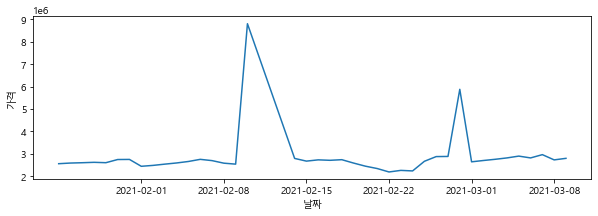

In [10]:
plt.figure(figsize = (10, 3))
sns.lineplot(data = mp_a, x = '날짜', y = '가격', ci = None)

* 3226, 6336행이 추가 될 경우 그래프가 비이상적으로 되고 값에 큰 영향을 주기 때문에 
데이터를 제거한다.

<AxesSubplot:xlabel='날짜', ylabel='가격'>

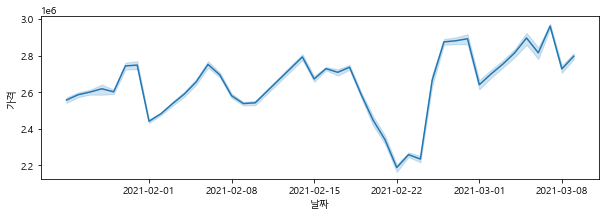

In [11]:
mp_a = mp_a[mp_a['가격'] < 4000000].copy()
plt.figure(figsize = (10, 3))
sns.lineplot(data = mp_a, x = '날짜', y = '가격')

In [12]:
mp_a.groupby('날짜')['가격'].mean().round().head()

날짜
2021-01-25    2557607.0
2021-01-26    2586753.0
2021-01-27    2601237.0
2021-01-28    2619195.0
2021-01-29    2602389.0
Name: 가격, dtype: float64

* 21.01.31 스타포스 강화 비용 30% 할인 이벤트가 시작 될 때에는 약 4% 정도 증가했지만, 이벤트가 끝나고, 가격이 약 11% 정도 감소했다.


* 21.02.18 환생의 불꽃, 어빌리티 확률 조작 사건이 발발하고 4일만에 약 20% 정도 감소했다.


* 21.02.24 환생의 불꽃, 어빌리티 확률 조작 사건 관련 보상안을 공지하고 보상안을 수령하는 그 다음날인 21.02.25에 약 19% 정도 증가했다. 그리고 꾸준히 증가해서 약 30% 정도까지 증가했다.

### 요일별 가격 변화

<AxesSubplot:xlabel='요일', ylabel='가격'>

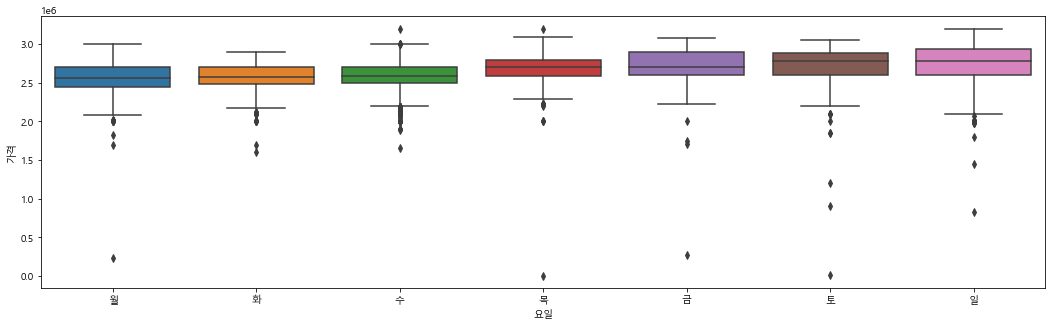

In [13]:
plt.figure(figsize = (18, 5))
sns.boxplot(data = mp_a, x = '요일', y = '가격')

<AxesSubplot:xlabel='요일', ylabel='가격'>

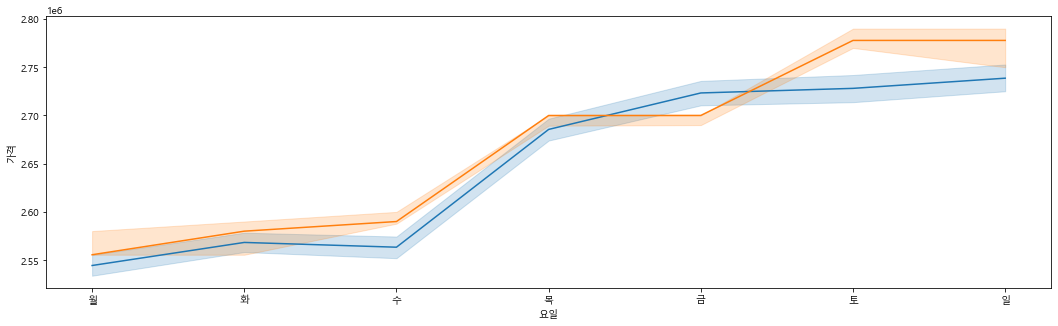

In [14]:
plt.figure(figsize = (18, 5))
sns.lineplot(data = mp_a, x = '요일', y = '가격') #평균값으로 그래프(파란색)
sns.lineplot(data = mp_a, x = '요일', y = '가격',estimator = np.median) #중앙값으로 그래프(주황색)

* 그래프를 보게 되면 평균적으로 월요일이 가격이 가장 낮고, 토요일에 가장 높은 것으로 나타난다.


* 평균적으로 목요일에 가격이 급등하게 된다.

### 개수별 가격 변화

<AxesSubplot:xlabel='개수', ylabel='가격'>

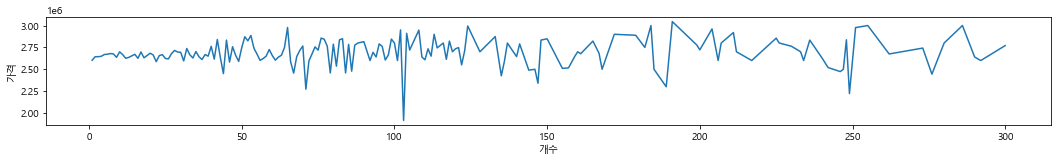

In [18]:
plt.figure(figsize = (18, 2))
sns.lineplot(data = mp_a, x = '개수', y = '가격', ci = None)

* 그래프를 그리게 되면 개수와 가격 간의 상관관계가 없어 보인다.

In [19]:
mp_a1 = mp_a.copy()

In [20]:
for i in mp_a1.index[:]:
    mp_a1.loc[i, '개수'] = mp_a1.loc[i, '개수']//10 *10
# A코의 개수를 10개 단위로 0부터 300까지 나눔

<AxesSubplot:xlabel='개수', ylabel='가격'>

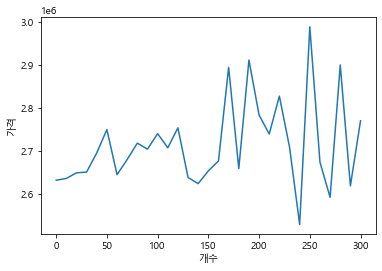

In [21]:
sns.lineplot(data = mp_a1, x = '개수', y = '가격', ci = None)

* 10개 단위로 나누어 봐도 개수에 따른 가격이 상관관계가 없는 것으로 나타난다.(21.03.03)